# Intervalos de Confianza

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Intervalo de Confianza para la media de una distribución normal (σ conocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

### Nivel de significancia (error): $\alpha$

El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:

$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde

- $\sigma$ = desviación estándar  
- $\frac{\sigma}{\sqrt{n}}$ = error estándar de la media  
- $z_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Observación**

- A mayor $n$, menor es el error estándar, y el intervalo de confianza es más pequeño.
- Esto hace que se acerque más a la media $\mu$, es decir, que haya menor variación.


**Ejemplo 1** Para tratar de estimar la media de consumo por cliente en un gran restaurante, se reunieron datos de una muestra de 49 clientes durante 3 semanas.

**a)** Supongamos que la **desviación estándar de la población** es de $\$2.50$. ¿Cuál es el error estándar de la media?

**b)** Con un nivel de confianza del $95\%$, ¿cuál es el margen de error?

**c)** Si la **media de la muestra** es de $\$22.60$, cuál es el intervalo de confianza del $95\%$ para la media de la población?

In [27]:
# Datos
n=49
sigma = 2.50
media_muestral = 22.60 
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
#error_estandar
print(f" a) Error estándar de la media: {error_estandar:.2f}")

# b) Margen de error
z = st.norm.ppf(1-(1-confianza) / 2)
margen_error = z * error_estandar
#margen_error
print(f" b) Margen de error con 95% de confianza: {margen_error:.2f}")

# c) 
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error
print(f" c) Intervalo de confianza del 95%: ({limite_inferior:.2f},{limite_superior:.2f})")

 a) Error estándar de la media: 0.36
 b) Margen de error con 95% de confianza: 0.70
 c) Intervalo de confianza del 95%: (21.90,23.30)


$1-\alpha=.95$, implica que $z_{\alpha/2} = z_{0.025} = 1.96$

**Ejemplo 2** Supongamos que se toma una muestra aleatoria de 100 personas para estimar la media del peso de una población, y se obtiene que la media muestral es de $70$ kg con una desviación estándar que es conocida de $10$ kg. Para un nivel de confianza del $95\%$, calcular el intervalo de confianza

In [37]:
# Datos
n = 100
media_muestral = 70
sigma = 10
nivel_confianza = 0.95
error_estandar = sigma / np.sqrt(n)

#Utilizaremos la función scipy.stats.norm.interval
# Sintaxis
# scipy.stats.norm.interval(confidence, loc = media, scale = error_estandar )

intervalo = st.norm.interval(confidence = nivel_confianza, loc = media_muestral, scale = error_estandar)
print(f"Intervalo de confianza del 95% es: {intervalo}")


Intervalo de confianza del 95% es: (68.04003601545995, 71.95996398454005)


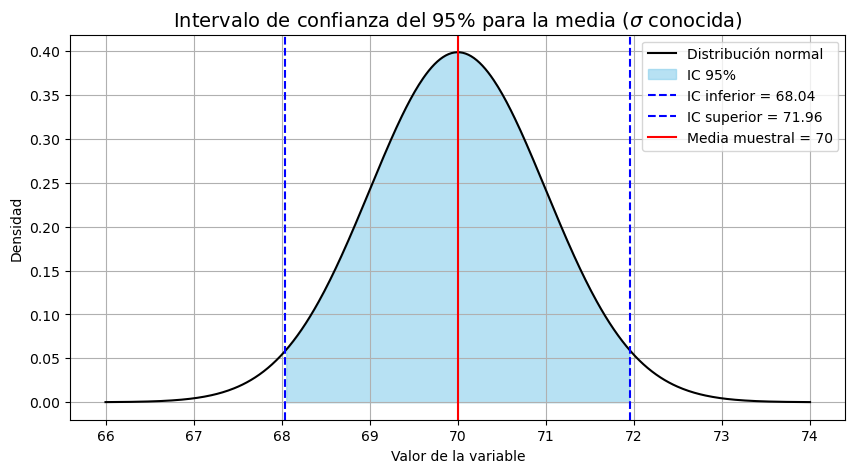

In [41]:
# Puntos para graficar la curva normal
x = np.linspace(media_muestral - 4*error_estandar, media_muestral + 4*error_estandar, 500)
y = st.norm.pdf(x, loc=media_muestral, scale=error_estandar)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribución normal', color='black')

# Sombrear el intervalo de confianza
plt.fill_between(x, y, where=(x >= intervalo[0]) & (x <= intervalo[1]), color='skyblue', alpha=0.6, label='IC 95%')

# Líneas verticales
plt.axvline(intervalo[0], color='blue', linestyle='--', label=f'IC inferior = {intervalo[0]:.2f}')
plt.axvline(intervalo[1], color='blue', linestyle='--', label=f'IC superior = {intervalo[1]:.2f}')
plt.axvline(media_muestral, color='red', linestyle='-', label=f'Media muestral = {media_muestral}')

plt.title('Intervalo de confianza del 95% para la media ($\\sigma$ conocida)', fontsize=14)
plt.xlabel('Valor de la variable')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

## Intervalo de Confianza para la media $\mu$ de una distribución normal ($\sigma$ deconocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

Si el tamaño de la muestra es menor a 30, se utiliza la $t$: 
### Estadístico t

Definimos el estadístico $t$ de la siguiente manera:
$$T = \frac{\bar{X}-\mu}{s/\sqrt{n}} \sim t_{(n-1)} $$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ desconocida) es:

$$
\left( \bar{X} - t_{\alpha/2} \frac{s}{\sqrt{n}}, \quad \bar{X} + t_{\alpha/2} \frac{s}{\sqrt{n}} \right)
$$
donde

- $s$ = desviación estándar muestral
- $\frac{s}{\sqrt{n}}$ = error estándar de la media  
- $t_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Ejemplo 3** Supongamos que tenemos los siguientes datos
$$ datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] $$
Calcular un intervalo de confianza para la media.

In [60]:
# Datos del ejemplo 
data = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82]
confidence = 0.95
gl = len(data) - 1 # grados de liber

# Media y error estandar
mean = np.mean(data)
error_est = st.sem(data)

# Intervalo de confianza usando t de Student
intervalo = st.t.interval(confidence, gl, loc = mean, scale = error_est)

print(f"Media muestral: {mean:.2f}")
print(f"Error estandar: {error_est:.2f}")
print(f"El intervalo de confianza del 95% es: {intervalo}")


Media muestral: 71.00
Error estandar: 5.75
El intervalo de confianza del 95% es: (58.000521742293884, 83.99947825770612)


**Ejemplo 4** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.

La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8

**a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.

**b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

In [75]:
from scipy.stats import chi2
# datos
n = 100
media_muestral = 1750
desv_estandar_muestral = 315.8
confianza = 0.90

# a) Usar la normal ya que el tamaño de la muestra es grande
error_est = desv_estandar_muestral / np.sqrt(n)
error_est
intervalo_media = st.norm.interval(confidence=confianza, loc = media_muestral, scale = error_est)
print(f"El intervalo de confianza del 90% es: {intervalo_media}")

# b) Intervalo de confianza para la varianza (usar chi-cuadrada)
alpha = 1-confianza
gl = n-1
s2 = desv_estandar_muestral**2

#Cuantiles de la chi-cuadrada
chi2_inf = st.chi2.ppf(alpha / 2,df=gl)
chi2_sup = st.chi2.ppf(1- alpha / 2,df=gl)

# Intervalo de confianza
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza}")

#Otra forma
chi2_low, chi2_high = chi2.interval(confianza,df=gl)
intervalo_varianza1 = ((gl * s2) / chi2_high, (gl * s2) / chi2_low )
print(f"El intervalo de confianza del 90% es: {intervalo_varianza1}")


El intervalo de confianza del 90% es: (1698.0555224608725, 1801.9444775391275)
El intervalo de confianza del 90% es: (80123.48643850331, 128146.71537457063)
El intervalo de confianza del 90% es: (80123.48643850331, 128146.71537457063)


**Ejemplo**  El artículo *"Evaluation of a Ventilation Strategy to Prevent Barotrauma in Patients at High Risk for Acute Respiratory Distress Syndrome"* reportó sobre un experimento con 120 pacientes con anestesistas en cuidados intensivos (UCI), los cuales fueron divididos al azar en dos grupos, donde cada uno esta compuesto por 60 pacientes. 

- Grupo A: promedio de permanencia = 14.1 horas
- Grupo B: promedio de permanencia = 17.5 horas
- Desviación estándar en ambos = 5.1 hrs

Encontrar un intervalo del $95\%$ de confianza para la diferecia de medias poblacionales: $(\mu_A - \mu_B)$  

In [89]:
#Datos 
n1 = 60
n2 = 60
media1 = 14.1
media2 = 17.5
sigma = 5.1
confianza = 0.95
alpha = 1-confianza
#gl = n1 + n2 -2

#valor critico
z = st.norm.ppf(1 - alpha / 2)

#Error estandar
error_est = sigma * np.sqrt(1/n1 + 1/n2)
dif_medias = media1 - media2
margen_error = z *error_est

lim_inf = dif_medias - margen_error
lim_sup = dif_medias + margen_error
print(f"Diferencia de las medias: {dif_medias:.2f}")
print(f"Intervalo de confianza del 95%: ({lim_inf:.2f},{lim_sup:.2f})")

Diferencia de las medias: -3.40
Intervalo de confianza del 95%: (-5.22,-1.58)
